In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

pd.set_option('display.max_rows', 1000)

In [136]:
df = pd.read_csv('imoveis-sao-paulo.csv')

In [137]:
# Verificar se o dataset possui dados faltantes (NA)
df.isna().sum()

Preço                  0
Condomínio             0
Tamanho                0
Quartos                0
Banheiros              0
Suítes                 0
Vagas                  0
Elevador               0
Mobiliado              0
Piscina                0
Novo                   0
Distrito               0
Tipo de Negociação     0
Tipo de Propriedade    0
Latitude               0
Longitude              0
dtype: int64

In [138]:
df.head()

,Preço,Condomínio,Tamanho,Quartos,Banheiros,Suítes,Vagas,Elevador,Mobiliado,Piscina,Novo,Distrito,Tipo de Negociação,Tipo de Propriedade,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim,rent,apartment,-23.525025,-46.482436


#### Verificação das colunas

In [139]:
df.columns

Index(['Preço', 'Condomínio', 'Tamanho', 'Quartos', 'Banheiros', 'Suítes',
       'Vagas', 'Elevador', 'Mobiliado', 'Piscina', 'Novo', 'Distrito',
       'Tipo de Negociação', 'Tipo de Propriedade', 'Latitude', 'Longitude'],
      dtype='object')

# Análise Exploratória de Imóveis em São Paulo

Este notebook busca responder perguntas específicas sobre os imóveis de São Paulo. 
A análise explorará preços, tamanhos, distribuição geográfica e características dos imóveis. 
Os dados foram coletados em abril de 2019.

## Perguntas que serão respondidas:
1. Qual é a distribuição de preços dos imóveis?
2. Existe relação entre preço e tamanho dos imóveis?
3. Como os preços variam entre os distritos?
4. Qual a distribuição de tipos de negociação (aluguel x venda)?
5. Quais distritos possuem imóveis mais caros e mais baratos?


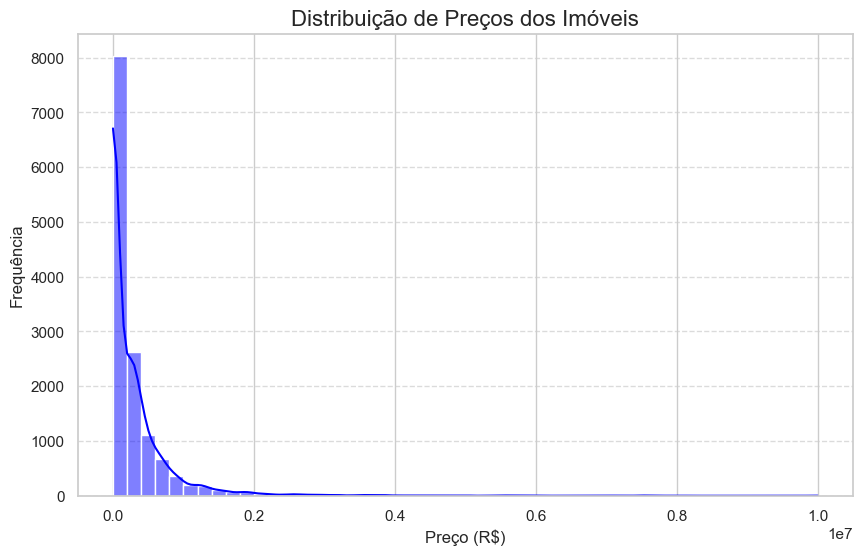

In [140]:
# Gráfico de distribuição de preços
sns.histplot(df["Preço"], bins=50, kde=True, color="blue")
plt.title("Distribuição de Preços dos Imóveis", fontsize=16)
plt.xlabel("Preço (R$)", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


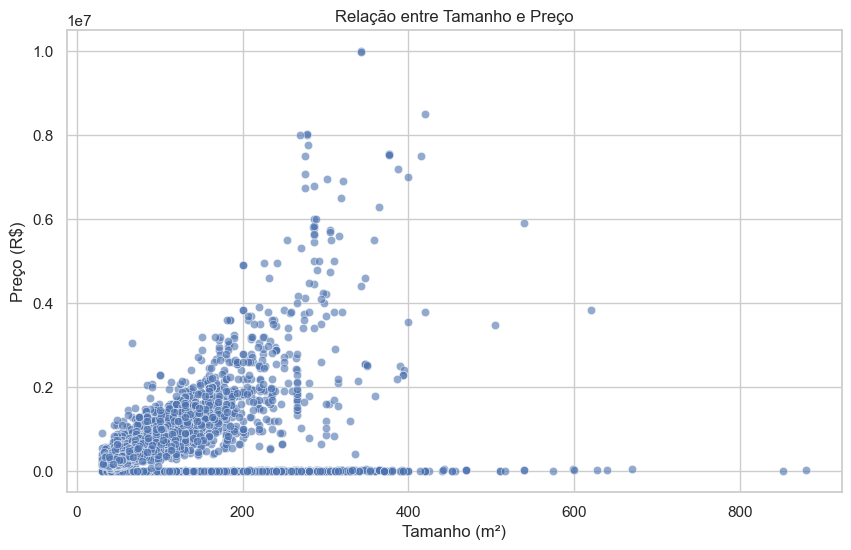

In [141]:
# Gráfico de dispersão entre preço e tamanho
sns.scatterplot(x="Tamanho", y="Preço", data=df, alpha=0.6)
plt.title("Relação entre Tamanho e Preço")
plt.xlabel("Tamanho (m²)")
plt.ylabel("Preço (R$)")
plt.grid(True)
plt.show()


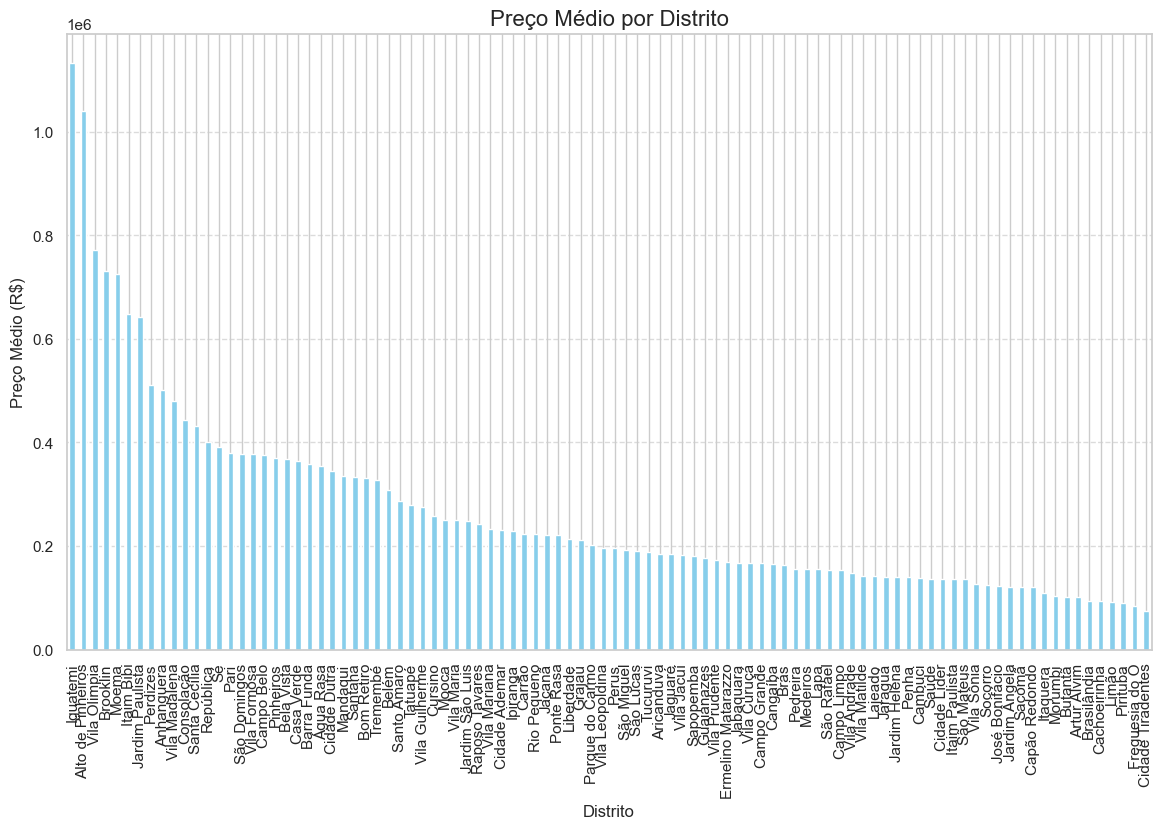

In [142]:
# Média de preço por distrito
preco_por_distrito = df.groupby("Distrito")["Preço"].mean().sort_values(ascending=False)

# Gráfico de barras
preco_por_distrito.plot(kind="bar", figsize=(14, 8), color="skyblue")
plt.title("Preço Médio por Distrito", fontsize=16)
plt.xlabel("Distrito", fontsize=12)
plt.ylabel("Preço Médio (R$)", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


##### Número de Imóveis para venda

In [143]:
df.loc[df['Tipo de Negociação'] == 'sale'].count()

Preço                  6412
Condomínio             6412
Tamanho                6412
Quartos                6412
Banheiros              6412
Suítes                 6412
Vagas                  6412
Elevador               6412
Mobiliado              6412
Piscina                6412
Novo                   6412
Distrito               6412
Tipo de Negociação     6412
Tipo de Propriedade    6412
Latitude               6412
Longitude              6412
dtype: int64

##### Número de imóveis para alugar

In [144]:
df.loc[df['Tipo de Negociação'] == 'sale'].count()

Preço                  6412
Condomínio             6412
Tamanho                6412
Quartos                6412
Banheiros              6412
Suítes                 6412
Vagas                  6412
Elevador               6412
Mobiliado              6412
Piscina                6412
Novo                   6412
Distrito               6412
Tipo de Negociação     6412
Tipo de Propriedade    6412
Latitude               6412
Longitude              6412
dtype: int64

C:\Users\napol\AppData\Local\Temp\ipykernel_18696\156028678.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Tipo de Negociação", data=df, palette="viridis")


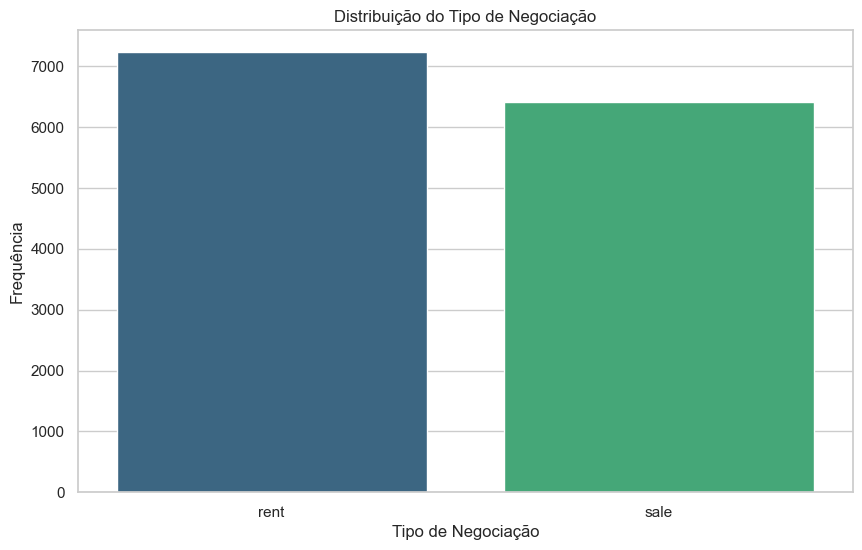

In [145]:
# Contagem de tipos de negociação
sns.countplot(x="Tipo de Negociação", data=df, palette="viridis")
plt.title("Distribuição do Tipo de Negociação")
plt.xlabel("Tipo de Negociação")
plt.ylabel("Frequência")
plt.show()


##### Imóveis mais caros para venda em cada distrito


In [146]:
imoveis_para_venda = df.loc[df['Tipo de Negociação'] == 'sale']
imoveis_para_venda.groupby(['Distrito',])['Preço'].max().sort_values(ascending=False)

Distrito
Iguatemi              10000000
Jardim Paulista        8500000
Vila Olimpia           8039200
Itaim Bibi             8000000
Alto de Pinheiros      7559420
Moema                  6950000
Perdizes               5500000
Consolação             5000000
Vila Mariana           4182000
Vila Madalena          4125000
Santa Cecília          3800000
Bela Vista             3800000
Campo Belo             3800000
Tatuapé                3700000
Brooklin               3600000
República              3550000
Casa Verde             3490000
Pinheiros              3190000
Vila Prudente          3050003
Vila Leopoldina        2960700
Santana                2800000
Santo Amaro            2600000
Mooca                  2450000
Butantã                2424900
Anhanguera             2420000
Belém                  2200000
Sé                     2190000
Jaguaré                1990000
Rio Pequeno            1970000
Vila Sônia             1950000
Mandaqui               1900000
Ipiranga               1830000

In [147]:
imoveis_para_venda.shape

(6412, 16)

#### Imóveis mais baratos para venda por distrito

In [148]:
imoveis_para_venda = df.loc[df['Tipo de Negociação'] == 'sale']
imoveis_para_venda.groupby(['Distrito',])['Preço'].min().sort_values(ascending=False)

Distrito
Iguatemi              600000
Vila Madalena         530000
Itaim Bibi            500000
Jaraguá               390000
Perdizes              380000
Alto de Pinheiros     375000
Brooklin              369000
Campo Belo            360100
Vila Leopoldina       356000
Jardim Paulista       350000
Vila Olimpia          350000
Moema                 330000
Anhanguera            320000
Ipiranga              300000
Vila Mariana          281000
Jaguaré               280000
Pinheiros             265999
Consolação            260865
Água Rasa             260000
Santana               250000
Tucuruvi              249000
Morumbi               247800
Limão                 240000
Cidade Dutra          240000
Tatuapé               228100
Lapa                  220000
Carrão                220000
São Domingos          216641
Mandaqui              215000
Vila Maria            207000
Bom Retiro            205900
Vila Guilherme        203000
São Lucas             202000
Rio Pequeno           200000
Mooca

##### Imóveis mais caros para alugar em cada distrito

In [149]:
imoveis_para_alugar = df.loc[df['Tipo de Negociação'] == 'rent']
imoveis_para_alugar.groupby('Distrito')['Preço'].max().sort_values(ascending=False)

Distrito
Alto de Pinheiros     50000
Campo Belo            50000
Jardim Paulista       50000
Iguatemi              45000
Itaim Bibi            40000
Moema                 40000
Pinheiros             38000
Vila Mariana          25000
Perdizes              25000
Consolação            23000
Vila Madalena         22000
Brooklin              21000
Santa Cecília         20000
Morumbi               19900
Cidade Tiradentes     18000
Santo Amaro           18000
Tatuapé               16000
Santana               15000
Ipiranga              15000
Campo Grande          14000
Vila Leopoldina       14000
Bela Vista            14000
Vila Andrade          13990
Jaraguá               12500
Cursino               12000
Vila Olimpia          11600
Vila Sônia            11000
Pedreira              10000
Lapa                  10000
República              9500
Medeiros               9000
Vila Curuçá            8823
Anhanguera             8000
Mooca                  7900
Barra Funda            7500
Cidade Dutr

In [150]:
df.columns

Index(['Preço', 'Condomínio', 'Tamanho', 'Quartos', 'Banheiros', 'Suítes',
       'Vagas', 'Elevador', 'Mobiliado', 'Piscina', 'Novo', 'Distrito',
       'Tipo de Negociação', 'Tipo de Propriedade', 'Latitude', 'Longitude'],
      dtype='object')

In [152]:
df.loc[df['Distrito'] == 'Cidade Tiradentes']

,Preço,Condomínio,Tamanho,Quartos,Banheiros,Suítes,Vagas,Elevador,Mobiliado,Piscina,Novo,Distrito,Tipo de Negociação,Tipo de Propriedade,Latitude,Longitude
146,550,100,48,2,2,1,1,0,0,0,0,Cidade Tiradentes,rent,apartment,-23.600600,-46.394280
147,600,110,46,2,2,1,1,0,0,0,0,Cidade Tiradentes,rent,apartment,-23.600594,-46.394294
148,700,0,48,2,2,1,1,0,0,0,0,Cidade Tiradentes,rent,apartment,-23.604520,-46.399058
149,6000,0,152,2,2,1,1,1,1,0,0,Cidade Tiradentes,rent,apartment,-23.588704,-46.403280
150,800,50,46,2,2,1,1,0,0,0,0,Cidade Tiradentes,rent,apartment,-23.590671,-46.396841
151,2000,615,74,3,2,1,1,1,0,1,0,Cidade Tiradentes,rent,apartment,-23.609832,-46.405243
152,1200,330,70,2,2,1,1,0,0,1,0,Cidade Tiradentes,rent,apartment,-23.610718,-46.408223
153,3000,500,60,1,2,1,2,0,0,1,0,Cidade Tiradentes,rent,apartment,-23.590012,-46.405122
154,750,50,45,2,2,1,1,0,0,0,0,Cidade Tiradentes,rent,apartment,-23.582514,-46.402498
155,850,0,54,2,2,1,1,0,0,0,0,Cidade Tiradentes,rent,apartment,-23.598796,-46.419974
